In [ ]:
import cv2
import os
import time
import datetime

In [ ]:
#penamaan labels
nama_labels_folder = ['bodrex', 'flu', 'neralgin']
jumlah_pengambilan_gambar = 20

In [ ]:
#setup folder gambar
path_image = os.path.join('workspace', 'penyimpanan_data_model', 'gambar') #masuk ke folder gambar jika ada
if not os.path.exists(path_image): 
    !mkdir {path_image}
for x in nama_labels_folder:
    path_folder_labels = os.path.join(path_image,x)
    if not os.path.exists(path_folder_labels):
        !mkdir {path_folder_labels} 

In [ ]:
#ambil gambar dari cv2
for label in nama_labels_folder:
    cap = cv2.VideoCapture(0)
    print("sedang mengambil data...... {}".format(label))
    for x in range(jumlah_pengambilan_gambar):
        ret, frame = cap.read()
        nama = os.path.join(path_image,label,label+'.'+'{}.jpg'.format(datetime.datetime.now()))
        cv2.imwrite(nama, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)
        
        if cv2.waitKey(1) & 0xFF == ord('z'): #0xff ctrl + z
            break
cap.release()
cv2.destroyAllWindows()

sedang mengambil data...... bodrex


In [ ]:
!pip install --upgrade pyqt5 lxml 

In [ ]:
folder_simpan_software_labelimg = os.path.join('workspace', 'labelimg')

In [ ]:
if not os.path.exists(folder_simpan_software_labelimg):
    !mkdir {folder_simpan_software_labelimg}
    !git clone https://github.com/tzutalin/labelImg {folder_simpan_software_labelimg}

Cloning into 'Tensorflow\labelimg'...


In [ ]:
train = os.path.join('workspace', 'penyimpanan_data_model', 'gambar', 'train')
test = os.path.join('workspace', 'penyimpanan_data_model', 'gambar', 'test')
zip_path = os.path.join('workspace', 'penyimpanan_data_model', 'gambar', 'train_test.tar.gz')

In [ ]:
!cd {folder_simpan_software_labelimg} && pyrcc5 -o libs/resources.py resources.qrc 

In [ ]:
!cd {folder_simpan_software_labelimg} && python labelImg.py

Cancel creation.

labelImg.py:965: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  bar.setValue(bar.value() + bar.singleStep() * units)



Cancel creation.
Image:D:\Deep Learning\classification_obat\obat_classif\workspace\data\images\IMG20210919161539.jpg -> Annotation:D:/Deep Learning/classification_obat/obat_classif/workspace/data/labels/IMG20210919161539.txt
Image:D:\Deep Learning\classification_obat\obat_classif\workspace\data\images\IMG20210919161542.jpg -> Annotation:D:/Deep Learning/classification_obat/obat_classif/workspace/data/images/IMG20210919161542.txt
Image:D:\Deep Learning\classification_obat\obat_classif\workspace\data\images\IMG20210919161542_01.jpg -> Annotation:D:/Deep Learning/classification_obat/obat_classif/workspace/data/images/IMG20210919161542_01.txt
Image:D:\Deep Learning\classification_obat\obat_classif\workspace\data\images\IMG20210919161543.jpg -> Annotation:D:/Deep Learning/classification_obat/obat_classif/workspace/data/images/IMG20210919161543.txt
[('OBAT NEURALGIN PUSING', [(1046, 1989), (1759, 1989), (1759, 3250), (1046, 3250)], None, None, False)]
Image:D:\Deep Learning\classification_o

In [ ]:
#############################################################################################################################


                                       PROSESS YOLOV5 TRAINING EVALUATE AND RUNNING DETECTOR



############################################################################################################################

In [ ]:
yolov5_folder = os.path.join('workspace','model','yolov5')
if not os.path.exists(yolov5_folder):
    !git clone https://github.com/ultralytics/yolov5
else:
    None

Cloning into 'yolov5'...


In [ ]:
!pip install pyyaml

  Using cached PyYAML-5.4.1-cp38-cp38-win_amd64.whl (213 kB)


In [ ]:
import yaml

In [ ]:
dict_file = {
    'path':'../../penyimpanan_data_model/gambar',
    'train':'train',
    'val':'train',
    'nc':18,
    'names':[
        'OBAT FLU BATUK',
        'OBAT BODREX',
        'OBAT NEURALGIN PUSING',
    ]
}
file = os.path.join(path_image)
with open(r'D:\Deep Learning\classification_obat\obat_classif\workspace\penyimpanan_data_model\gambar\dataset.yaml', 'w') as file:
    documents = yaml.dump(dict_file, file)


In [ ]:
yolov5_folder = os.path.join('workspace','yolov5')

In [ ]:
file_datasets = 'D:\Deep Learning\classification_obat\obat_classif\workspace\penyimpanan_data_model\gambar\datasets.yaml'
file_datasets

'D:\\Deep Learning\\classification_obat\\obat_classif\\workspace\\penyimpanan_data_model\\gambar\\datasets.yaml'

In [ ]:
 !cd {yolov5_folder} && python train.py --img 224 --batch 16 --epochs 2000 --data datasets.yaml --weights yolov5s.pt --worker 3

In [ ]:
!pip uninstall wandb

In [ ]:
!cd {yolov5_folder} && python train.py --img 224 --batch 16 --epochs 500 --data datasets.yaml --weights yolov5s.pt --worker 3

YOLOv5  2021-9-14 torch 1.9.0+cpu CPU

train: weights=yolov5s.pt, cfg=, data=datasets.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=3, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: up to date with https://github.com/ultralytics/yolov5 
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
Plotting labels... 

autoanchor: Analyzing anchors... anchors/target = 5.81, Best Possible Recall (BPR) = 1.0000
                 all         54         54    0.00273     0.0556    0.00158   0.000235
                 all         54         54    0.00608       0.13    0.



hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir runs\train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=18

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Co

In [ ]:
!cd {yolov5_folder} && pip install -r requirements.txt

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached clang-5.0-py3-none-any.whl
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Deep Learning\\classification_obat\\obat_classif\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Check the permissions.



In [ ]:
import torch

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='workspace/yolov5/runs/train/exp8/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Hp/.cache\torch\hub\master.zip
YOLOv5  2021-9-15 torch 1.9.0+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7099759 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [ ]:
import os
img = os.path.join('workspace','data', 'images', 'IMG20210913150316.jpg')
results = model(img)


In [ ]:
results.print()

image 1/1: 3120x4160 1 OBAT FLU BATUK, 1 OBAT NEURALGIN PUSING
Speed: 176.4ms pre-process, 313.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

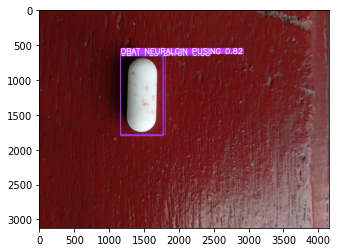

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
import cv2